In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from oiffile import imread
from PIL import Image
import random
import skimage
from skimage.transform import resize
import matplotlib
import glob
import torch
import sys
sys.path.insert(0, '..')
import scipy.io as sio
import matplotlib.patches as patches
from skimage.measure import label,regionprops
from matplotlib_scalebar.scalebar import ScaleBar
from skimage.transform import rescale
import dognet
import functions
from sklearn.metrics import roc_curve, auc
import os, os.path
%matplotlib inline
from skimage.draw import circle

In [14]:
nets = [[[],[]],[[],[]],[[],[]]]
errorList = [[[],[]],[[],[]],[[],[]]]

ivalues=[14,16,17]
jvalues=[1e-3]

for i in range(0,3):
    #get training masks
    path1 = glob.glob("../datasets/flocculusA/trainingMasks/*.npy")
    trainingMasks = functions.get_trainingMasks(path1)
    #get and scale training images
    path2 = glob.glob("../datasets/flocculusA/trainingImages3/*.npy")
    trainingImages,collman = functions.get_trainingImages(path2,ivalues[i])
    
    imagestraining=[0,1,2,3,5,6,8,9,10,12,13,14,15,16,17,19,20,21,22,24,26,28,29,31,32,33,34]
    imagestesting=[4,7,11,18,23,25,27,30,35]

    newTrainingImages=[]
    newTrainingMasks=[]

    for p in range(0,36):
        trainingImages[p][0]=0
    
    for k in imagestraining:
        newTrainingImages.append(trainingImages[k])
        newTrainingMasks.append(trainingMasks[k])
        
    for j in range(0,1):
        device = torch.device("cpu")
        net = dognet.SimpleAnisotropic(3,15,27).to(device)
        net.weights_init()
        #print(dognet.get_n_params(net))
        net,errors =dognet.train_routine(net.to(device),dognet.create_generator(newTrainingImages,newTrainingMasks),n_iter=800,margin=5,loss='softdice',lr=jvalues[j])
        nets[i][j] = net
        errorList[i][j]= errors

tensor([40905.]) (10, 1, 64, 64) 4096 0.0 0.0
<function soft_dice_loss at 0x129c9cea0>
Training started!
[====================] 100%
Training finished!
tensor([798.5098]) (10, 1, 64, 64) 4096 51.0 1.0
<function soft_dice_loss at 0x129c9cea0>
Training started!
[====================] 100%
Training finished!
tensor([40930.]) (10, 1, 64, 64) 4096 0.0 0.0
<function soft_dice_loss at 0x129c9cea0>
Training started!
[====================] 100%
Training finished!


In [15]:
for i in range(0,3):
    for j in range(0,1):
        if i==0:
            sc="14"
        elif i==1:
            sc="16"
        elif i==2:
            sc="17"
        lrN="1e-3"
        
        nName="channel2net_%s_%s" % (sc,lrN)
        
        torch.save(nets[i][j], nName)

30


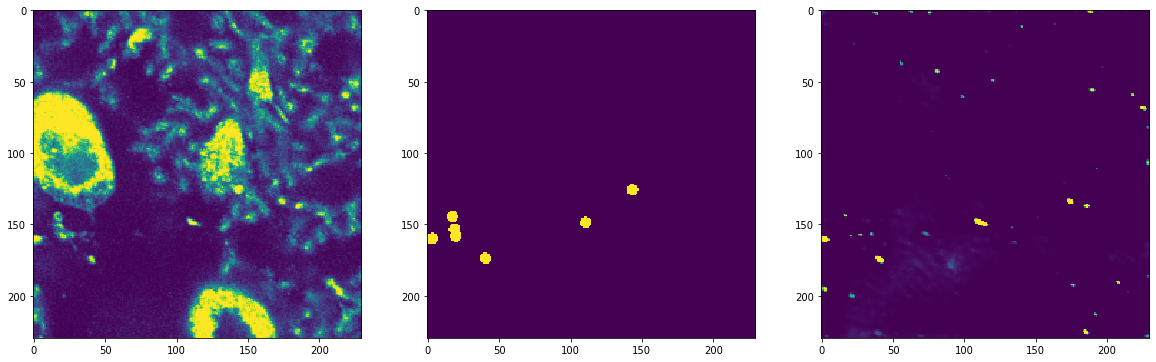

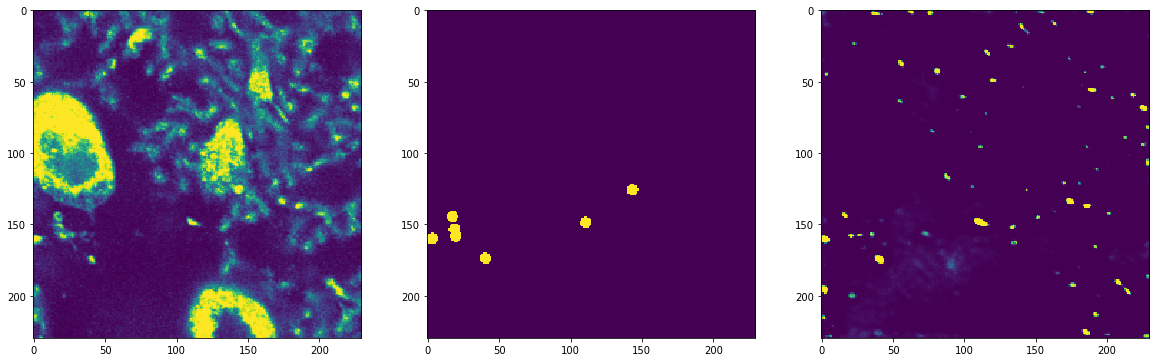

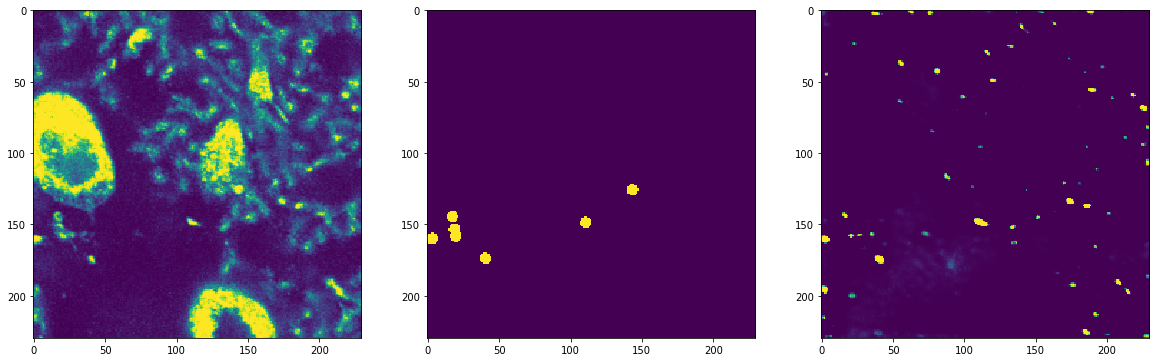

In [17]:
x=random.choice([4,7,11,18,23,25,30,35])
#x=18
print(x)
testingNumber=1
#plt.figure(figsize=(20,20))


for i in range(0,3):
    for j in range(0,1):
        b = functions.get_coords(x,testingNumber,len(trainingImages))
        #plt.subplot(2,3,i+j+1)
        #plt.imshow(functions.estimate_quality(collman,nets[i][j],b,range(x,x+1)))
        functions.show_prediction(x,testingNumber,trainingImages,trainingMasks,collman,nets[i][j],b)

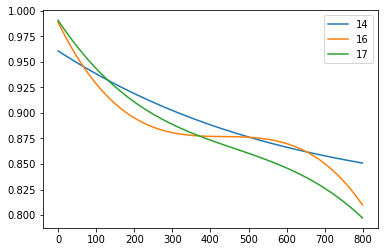

In [68]:
from scipy.interpolate import UnivariateSpline

for i in range(0,3):
    y= errorList[i][0]
    x= range(0,800)

    s = UnivariateSpline(x, y, s=13)
    xs = np.linspace(0, 799, 100)
    ys = s(xs)

    #plt.plot(x, y, 'o')
    plt.plot(xs, ys)

plt.legend(['14','16','17'])

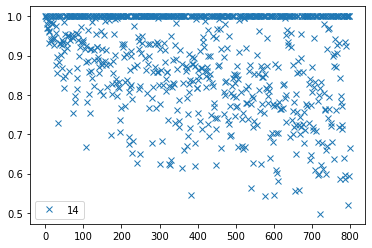

In [58]:
plt.plot(errorList[0][0],'x')
#plt.plot(errorList[1][0])
#plt.plot(errorList[2][0])
plt.legend(['14','16','17'])

TypeError: can only concatenate tuple (not "int") to tuple

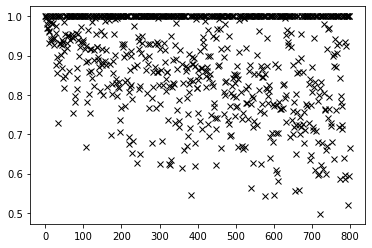

In [28]:
newL= [[] for j in range(0,800)]

for i in range(0,800):
    newL[i]=[i,errorList[0][0][i]]
    
data = newL
x, y = zip(*data)
plt.plot(x, y, 'kx')

stacked_x = np.array([x,x+1,x-1])
coeffs = np.polyfit(x,y,3)
x2 = np.arange(min(x)-1, max(x)+1, .01) #use more points for a smoother plot
y2 = np.polyval(coeffs, x2) #Evaluates the polynomial for each x2 value
plt.plot(x2, y2, label="deg=3")

In [23]:
errorList[0][0][1]

0.9951356649398804

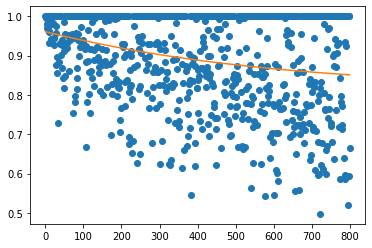

In [45]:

from scipy.interpolate import UnivariateSpline

y= errorList[0][0]
x= range(0,800)

s = UnivariateSpline(x, y, s=11)
xs = np.linspace(0, 799, 100)
ys = s(xs)

plt.plot(x, y, 'o')
plt.plot(xs, ys)
plt.show()

In [29]:
print(errorList[0][0])

[1.0, 0.9951356649398804, 1.0, 0.999463677406311, 0.9797694683074951, 0.9703150391578674, 0.9688528180122375, 1.0, 0.9875921607017517, 0.9630472660064697, 0.9309649467468262, 0.9597053527832031, 1.0, 1.0, 0.9416582584381104, 0.9364895224571228, 0.9854784607887268, 0.981514036655426, 1.0, 1.0, 0.9425125122070312, 0.983494758605957, 0.9263973236083984, 0.9435879588127136, 0.9446595907211304, 1.0, 1.0, 0.9565629363059998, 0.8767595887184143, 0.9754086136817932, 1.0, 0.8975771069526672, 0.8548441529273987, 1.0, 0.7291116714477539, 1.0, 0.8828734159469604, 1.0, 0.9297460317611694, 0.931531548500061, 1.0, 1.0, 0.9011691808700562, 0.8692747354507446, 0.9263126254081726, 0.9399248361587524, 0.9340092539787292, 0.8421458005905151, 0.9114388227462769, 0.8169054985046387, 0.9863322973251343, 0.8476577997207642, 1.0, 0.9561009407043457, 1.0, 1.0, 1.0, 0.9201081991195679, 0.9313886761665344, 0.9485287070274353, 0.9517548680305481, 0.859876275062561, 1.0, 1.0, 1.0, 1.0, 0.940597414970398, 1.0, 1.0, 